#### t-dist. Stochastic Neighbor Embedding

- implementation
- t-SNE creates a joint probability distribution matrix for each data points in our dataset
- find similarities between data points in original space
- see how related data points are in our orginal dataset
- formula
    - sigma: our variance
    - perplexity: probabilty distribution for each instance multiplied by the log2 probability for each instance, perplexity is a free parameter that we choose when defining our model, perplexity is the number of neighbors for each data point, too few data points and a too low perplexity won't capture the local structure
    - sigma i found through finding where perplexity of probability distribution equals pre-defined perplexity
        - perplexity generally dictates how many neighbors to consider when finding the conditional probabilities
        - required to scale both noise and dataset size
        - low perplexity captures more of the local structure, high perplexity captures more of the global structure => also affected by noise and size of the dataset and how sparse data points are or if there are different manifolds (separate manifolds as own clusters)
- 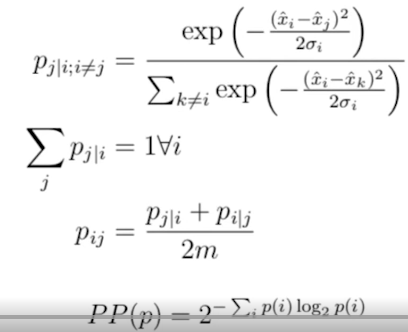
- learn (or replicate) lower dimensional (2d or 3d) map that reflects higher dimensionial probability distributions as best as possible
- higher dimensions: Gaussian distribution
- lower dimensions: t distributions
- clusters: data points that are related to each other will be grouped into similar clusters
- 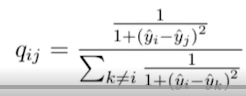
- loss function: find y_i through minimizing Kullback-Leibler (KL) Divergence
    - if it's not convex, so we get different solutions
    - for t algorithm always iterate over random sets to find the lowest loss
- 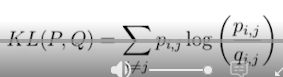

----------

#### Algorithm additions

- after finding joint probability distributions in original space, joint probability matrix is multiplied by a factor (=early exaggeration) before optimization stage
    - this helps separate clusters even more
- "angle" says how much of a region can be approx. to a single point
    - speed vs accuracy tradeoff (if angle between points is too small it will consider all of that region as represented by one point)
    - if we increase the angle a larger region will be considered as one point (decrease means a smaller region will be affected)
    - higher angle = faster, lower angle = slower
- 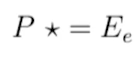

-----------

#### Barnes-Hut

- faster speed, but is an approximation to the t-SNE, requires dense input
- only works when embedding dimensions is 3 or less
- scales better to larger amounts of data points (can work at up to 100k data points, exact method only up to around 1k)

-----------

#### Considerations

- Kullback-Leibler (KL) divergence is not convex, so different initializations can lead to different results
    - iterate over different initialization states and choose the result with lowest loss
- focuses on finding local structures (affected by the perplexity that we choose => affects clusterization)
- good when there are several different manifolds in the dataset (t-SNE helps with separation finding local structure over global structure)
- perplexity adapts sigma_i based on prob. dens.
- not so good at unfolding a single manifold
- in high original dimensions distances should be changed from euclidean to intrinsic geometric (because it's better defined than the euclidean)
- because some of our algorithms used nearest neighbor based approaches, it can lead to better performance if we perform feature scaling before dimensionality Reduction
- beware of noisy data, increasing neighborhood size is good for dealing with noise/sparseness, decreasing size helps better capture local structure (instead of noise)
- singular matrices can also arise from duplicate data points (when our data becomes too sparse), beware of those. Otherwise look to increase neighborhood size